In [3]:
import scenario.sts
import scenario.weight
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

STS_TEST_IMG = 'test/imgs/test_sts.jpg'

VES_TEST_IMG = 'test/imgs/weight/parts_used_11_44_58_22445850_11.jpg'
VES_TEST_IMG_CROPPED = 'test/imgs/weight/photo_2023-01-31_00.jpg'

Что тестируем? 0 - стс, 1 - весы


YOLOv5  2022-12-6 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  2022-12-6 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2022-12-6 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7101823 parameters, 0 gradients, 16.0 GFLOPs
Adding AutoShape... 
YOLOv5  2022-12-6 Python-3.8.10 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7069459 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


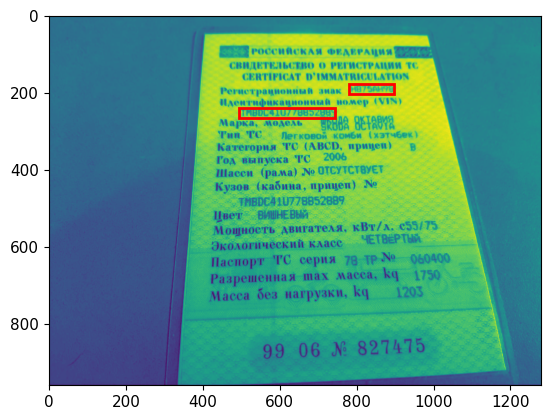

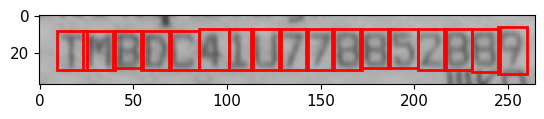

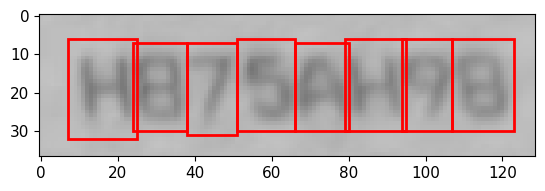

{1: 'TMBDC41U77BB52889', 0: 'H875AH98'}


In [4]:
print('Что тестируем? 0 - стс, 1 - весы')
test_choice = int(input())
fields_text = {}
if test_choice:
    test_ves = scenario.weight.Weight()
    print(test_ves.recognize_weight(VES_TEST_IMG))
else:
    test_sts = scenario.sts.STS()
    img = cv.imread(STS_TEST_IMG)
    #cv.imshow('input', img)
    img = test_sts.rotation_model_result(img)
    #cv.imshow('rotated', img)
    fields_imgs = test_sts.detection_model_result(img)
    test_sts.detection_model_boxes(img)
    for field_img, i in fields_imgs:
        # cv.imshow('field_'+str(i), field_img)
        # plt.imshow(field_img)
        fields_text[i] = test_sts.recognition_model_result(field_img, bool(i))
        test_sts.detection_model_boxes(field_img, recognition=1, vin=i)
    # plt.show()
    print(fields_text)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    # print(test_sts.recognize_sts(STS_TEST_IMG))